# Métodos diretos de resolução de sistemas lineares - A Regra de Cramer

Há diversas formas de resolver sistemas lineares $n x n$. Uma maneira popular entre os estudantes de ensino médio é a regra de Cramer.

Para um sistema $Ax = b$ de ordem $n$, calculamos o determinante $D$ da matriz $A$ e, para cada $x_j, j = 1, \dots, n$, calculamos os respectivos determinantes $D_j$, que são os determinantes das matrizes obtidas a partir de $A$ substituindo-se a coluna $j$ pelo vetor $b$.

Os valores das variáveis serão $x_1 = \frac{D_1}{D}, \dots, x_n = \frac{D_n}{D}$.

No entanto, é notória a ineficiência computacional deste método, cuja complexidade é de ordem fatorial, conforme exibiremos brevemente mais abaixo, mesmo utilizando cálculo de determinante de forma otimizada, disponível no módulo [*numpy*](http://www.numpy.org/).

## Regra de Cramer

Importaremos o módulo *numpy* para utilizar sua função de cálculo de determinante para uma matriz quadrada, dentro de nossa rotina de implementação da regra de Cramer.

In [1]:
#importando o numpy (alias np)
import numpy as np

Definição da função *regra_de_cramer*, que receberá dois parâmetros:

* Uma matriz quadrada $A$ de ordem $n$ (matriz dos coeficientes do sistema)
* Um vetor $b$ de dimensão $n$ (vetor constante)

O resultado da função será o vetor $x$, também de ordem $n$ (*vetor solução do sistema*).

Restringiremos nossa função a sistemas de soluções únicas.

In [2]:
#definindo função
def regra_de_cramer(matriz_coef, vetor_const):
    
    """
    Conforme explicado na célula anterior, a função recebe dois argumentos (uma matriz quadrada e 
    um vetor) e retorna um vetor solução para o sistema
    """    
    
    #série de verificações sobre os argumentos da função
    if vetor_const.ndim > 1:
        raise Exception('O segundo argumento deve ser um vetor unidimensional!')
    
    if matriz_coef.ndim > 2:
        raise Exception('O primeiro argumento deve ser uma matriz, isto é, um array bidimensional!')
    
    if matriz_coef.shape[0] != matriz_coef.shape[1]:
        raise Exception('O primeiro argumento deve ser uma matriz quadrada!')
    
    #garantindo que o input é matriz
    matriz_coef = np.asmatrix(matriz_coef)
    
    #determinante da matriz de coeficientes A
    d = np.linalg.det(matriz_coef)
    
    #A rotina será limitada a sistemas com solução única.
    if d == 0:
        raise Exception('O primeiro argumento deve ser uma matriz quadrada com determinante diferente de zero')
        
    #Criação de vetor que receberá os determinantes obtidos pelas permutações das colunas de A com o vetor b
    d_is = np.empty(vetor_const.size)
    
    #loop para preenchimento do vetor com os determinantes
    for x in range(vetor_const.size):
        
        #criação de matriz temporária
        #np.copy para que matriz_temp e matriz_coef sejam objetos diferentes (e não nomes diferentes para a mesma referência)
        #np.asmatrix para converter para matriz o resultado de np.copy
        matriz_temp = np.asmatrix(np.copy(matriz_coef))
                        
        #substituição da i-ésima coluna pelo vetor b
        #necessário converter o vetor b para matriz (np.asmatrix) e transpor (.T)
        matriz_temp[:, x] = np.asmatrix(vetor_const).T
                        
        #determinante da matriz temporária e armazenamento no vetor de determinantes
        d_is[x] = np.linalg.det(matriz_temp)
                            
    #list comprehension com os determinantes
    x = [i/d for i in d_is]
        
    #resultado da função (convertendo em numpy array)
    return np.array(x)

## Testes de performance

Conforme o tamanho do sistema cresce, sabemos que o desempenho cairá drasticamente, como dito acima.

Exibiremos abaixo uma pequena bateria de testes exemplificando, fazendo o número de equações e incógnitas de nosso sistema, $n$, variar de 1 a 1000.

Evidentemente, como construímos a função *regra_de_cramer* sobre o módulo *numpy*, já otimizado, não teremos decaimento de performance absurda, mas a comparação de *regra_de_cramer* com a função *numpy.linalg.solve* será bastante ilustrativa.

In [3]:
#número de execuções da bateria
n = 100

#arrays para armazenar os tempos de execução de cada função
res_regra = np.empty(n)
res_solve = np.empty(n)

for i in range(n):
    
    #estabelecimento de matriz quadrada (elementos provindo de uma distribuição normal padrão)
    A = np.asmatrix(np.random.randn(i, i))
    
    #estabelecimento do vetor constante
    b = np.random.randn(i)
    
    #https://stackoverflow.com/questions/52738709/how-to-store-time-values-in-a-variable-in-jupyter
    #no endereço acima há uma resposta mostrando como armazenar em uma variável os resultados de %timeit
    #e explicando o significado dos parâmetros -n1 -r1 e -o
    
    res_aux = %timeit -n1 -r1 -o regra_de_cramer(A,b)
    res_regra[i] = res_aux.average
    res_aux = %timeit -n1 -r1 -o np.linalg.solve(A,b)
    res_solve[i] = res_aux.average


26 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
431 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
607 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
212 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
933 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
216 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
850 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
209 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.09 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
227 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.19 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
326 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.35 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
211 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.59 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
188 µs ± 0 ns per loop (mean ± std. d

73.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
968 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
72.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.07 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
62.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
535 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
66.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
892 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
59.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
464 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
23.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
463 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
26.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
365 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
24.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
427 µs ± 0 ns per loop (mean ± 

## Exibindo a diferença de desempenho

### Média e desvio padrão

In [4]:
print("Para a função regra_de_cramer temos: \n \n",
     f"A média do tempo de execução é de {round(np.mean(res_regra), 6)} \n",
     f"O desvio padrão do tempo de execução é de {round(np.std(res_regra), 6)} \n",
     f"O tempo de execução máximo é de {round(np.amax(res_regra), 6)} \n",
     f"O tempo de execução mínimo é de {round(np.amin(res_regra), 6)} \n")

Para a função regra_de_cramer temos: 
 
 A média do tempo de execução é de 0.020396 
 O desvio padrão do tempo de execução é de 0.016754 
 O tempo de execução máximo é de 0.073287 
 O tempo de execução mínimo é de 0.000607 



In [5]:
print("Para a função numpy.linalg.solve temos: \n \n",
     f"A média do tempo de execução é de {round(np.mean(res_solve), 6)} \n",
     f"O desvio padrão do tempo de execução é de {round(np.std(res_solve), 6)} \n",
     f"O tempo de execução máximo é de {round(np.amax(res_solve), 6)} \n",
     f"O tempo de execução mínimo é de {round(np.amin(res_solve), 6)} \n")


Para a função numpy.linalg.solve temos: 
 
 A média do tempo de execução é de 0.000525 
 O desvio padrão do tempo de execução é de 0.001339 
 O tempo de execução máximo é de 0.013708 
 O tempo de execução mínimo é de 0.000188 



### Comparação gráfica

In [6]:
import matplotlib.pyplot as plt

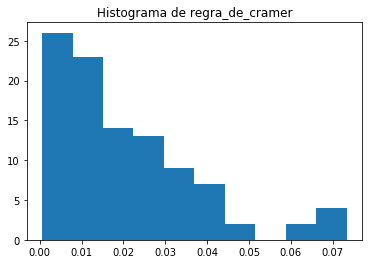

In [7]:
_ = plt.hist(res_regra)
_ = plt.title('Histograma de regra_de_cramer')
plt.show()

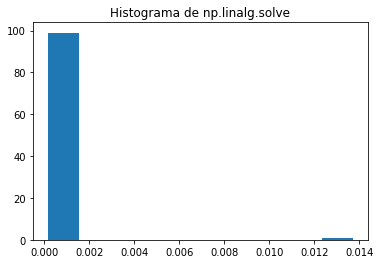

In [8]:
_ = plt.hist(res_solve)
_ = plt.title('Histograma de np.linalg.solve')
plt.show()

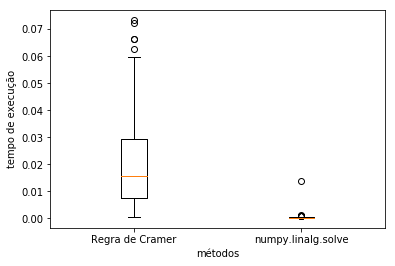

In [9]:
#armazenado os resultados em uma variável
data = [res_regra, res_solve]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xlabel('métodos')
ax.set_ylabel('tempo de execução')
ax.set_xticklabels(['Regra de Cramer', 'numpy.linalg.solve'])

plt.show()

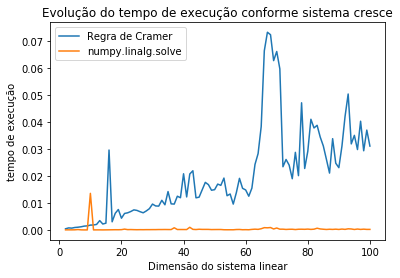

In [10]:
fig, ax = plt.subplots()

_ = plt.plot(*zip(*list(enumerate(res_regra, start = 1))[1:]))
_ =plt.plot(*zip(*list(enumerate(res_solve, start = 1))[1:]))
ax.set_xlabel('Dimensão do sistema linear')
ax.set_ylabel('tempo de execução')
_ = plt.legend(['Regra de Cramer', 'numpy.linalg.solve'])
_ = plt.title('Evolução do tempo de execução conforme sistema cresce')

#_ = plt.set_xlabel('Dimensão do sistema linear')
#_ = plt.set_ylabel('Tempo de processamento (em milissegundos)')

plt.show()

Como visto acima, o uso da regra de cramer é ruim computacionalmente - e, de fato, a função [*numpy.linalg.solve*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html) é implementada por meio da rotina [LAPACK _gesv](https://software.intel.com/en-us/mkl-developer-reference-c-gesv), a qual, conforme sua documentação, se vale da *decomposição LU*.

"The $LU$ decomposition with partial pivoting and row interchanges is used to factor $A$ as $A = P*L*U$, where $P$ is a permutation matrix, $L$ is unit lower triangular, and $U$ is upper triangular. The factored form of $A$ is then used to solve the system of equations $A*X = B$ ."